In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

class ImageProcessor:
    def __init__(self, image_path):
        # Load the image as a NumPy array while preserving RGBA format
        self.image_path = image_path
        self.image = np.array(Image.open(image_path).convert("RGBA"))
    
    def display_images(self, modified_image, title):
        # Displays the original and modified images side by side for comparison
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        axes[0].imshow(self.image)
        axes[0].set_title("Original Image")
        axes[0].axis("off")  # Hide axis for clarity
        
        axes[1].imshow(modified_image)
        axes[1].set_title(title)
        axes[1].axis("off")  # Hide axis for clarity
        
        plt.show()
    
    def invert_colors(self):
        # Invert the colors of the image while keeping transparency the same
        inverted_image = self.image.copy()
        inverted_image[:, :, :3] = 255 - inverted_image[:, :, :3]  # Apply inversion to RGB channels only
        self.display_images(inverted_image, "Inverted Colors")
    
    def to_grayscale(self):
        # Convert image to grayscale while maintaining transparency
        grayscale = np.dot(self.image[..., :3], [0.2989, 0.587, 0.114])  # Weighted sum to maintain brightness balance
        grayscale_image = np.dstack((grayscale, grayscale, grayscale, self.image[..., 3]))  # Preserve alpha channel
        self.display_images(grayscale_image.astype(np.uint8), "Grayscale Image")
    
    def rotate_90(self):
        # Rotate the image by 90 degrees clockwise
        rotated_image = np.rot90(self.image, k=-1, axes=(0, 1))  # Rotates the matrix in a clockwise direction
        self.display_images(rotated_image, "Rotated 90° Clockwise")
    
    def mirror_horizontal(self):
        # Flip the image horizontally to create a mirror effect
        mirrored_image = np.fliplr(self.image)  # Reverse the pixel order along the horizontal axis
        self.display_images(mirrored_image, "Mirrored (Horizontally Flipped)")
    
    def change_transparency(self, alpha_factor):
        # Reduce opacity by multiplying the alpha channel with a given factor
        semi_transparent = self.image.copy()
        semi_transparent[:, :, 3] = (self.image[:, :, 3] * alpha_factor).astype(np.uint8)  # Scale alpha values
        self.display_images(semi_transparent, "Semi-Transparent Image")
    
    def increase_brightness(self, factor):
        # Increase brightness by multiplying each RGB component while preventing overflow
        brightened_image = self.image.copy()
        brightened_image[:, :, :3] = np.clip(self.image[:, :, :3] * factor, 0, 255)  # Ensure values remain valid
        self.display_images(brightened_image.astype(np.uint8), "Brighter Image")
    
    def add_black_border(self, border_size=10):
        # Adds a solid black border around the image
        h, w, _ = self.image.shape
        
        # Create a fully black image with new dimensions including the border
        bordered_image = np.zeros((h + 2 * border_size, w + 2 * border_size, 4), dtype=np.uint8)
        
        # Ensure the border is black by setting RGB channels to 0 and full opacity
        bordered_image[:, :, :3] = 0  # RGB set to black
        bordered_image[:, :, 3] = 255  # Alpha (opacity) set to full
        
        # Place the original image at the center of the bordered image
        bordered_image[border_size:-border_size, border_size:-border_size, :] = self.image
        
        # Display the modified image
        self.display_images(bordered_image, "Image with Black Border")
    
    def change_background_to_green(self):
        # Replace transparent areas with a solid green background
        green_background = np.full_like(self.image, [0, 255, 0, 255])  # Fill with solid green (0, 255, 0)
        mask = self.image[:, :, 3] == 0  # Identify transparent pixels
        green_background[~mask] = self.image[~mask]  # Keep non-transparent areas unchanged
        self.display_images(green_background, "Green Background")
    
    def swap_blue_yellow(self):
        # Swaps blue and yellow colors in the Python logo while preserving transparency
        swapped_image = self.image.copy()

        # Identify blue regions based on RGB values
        blue_mask = (
            (swapped_image[:, :, 2] > 130) &  # Blue component is strong
            (swapped_image[:, :, 0] < 120) &  # Red component is weak
            (swapped_image[:, :, 1] < 140)    # Green component is weak
        )

        # Identify yellow regions based on RGB values
        yellow_mask = (
            (swapped_image[:, :, 0] > 180) &  # Red component is strong
            (swapped_image[:, :, 1] > 180) &  # Green component is strong
            (swapped_image[:, :, 2] < 130)    # Blue component is weak
        )

        # Swap Blue → Yellow by changing the RGB values
        swapped_image[blue_mask, 0] = 255  # Red set to max
        swapped_image[blue_mask, 1] = 230  # Green slightly reduced for natural yellow
        swapped_image[blue_mask, 2] = 50   # Blue reduced

        # Swap Yellow → Blue by changing the RGB values
        swapped_image[yellow_mask, 0] = 50   # Red slightly reduced for realistic blue
        swapped_image[yellow_mask, 1] = 50   # Green reduced
        swapped_image[yellow_mask, 2] = 255  # Blue set to max

        # Display the modified image
        self.display_images(swapped_image, "Swapped Blue & Yellow")
    
    def apply_sepia(self):
        # Apply a sepia effect to give the image a vintage tone while keeping transparency
        sepia_image = self.image.copy()
        tr = 0.393 * sepia_image[..., 0] + 0.769 * sepia_image[..., 1] + 0.189 * sepia_image[..., 2]
        tg = 0.349 * sepia_image[..., 0] + 0.686 * sepia_image[..., 1] + 0.168 * sepia_image[..., 2]
        tb = 0.272 * sepia_image[..., 0] + 0.534 * sepia_image[..., 1] + 0.131 * sepia_image[..., 2]
        
        # Ensure the transformed values remain within the valid range
        sepia_image[..., 0] = np.clip(tr, 0, 255)
        sepia_image[..., 1] = np.clip(tg, 0, 255)
        sepia_image[..., 2] = np.clip(tb, 0, 255)
        
        # Display the modified image
        self.display_images(sepia_image.astype(np.uint8), "Sepia Effect")

In [2]:
# Initialize ImageProcessor with Python logo image
img_processor = ImageProcessor("python-logo.png")


Tasks

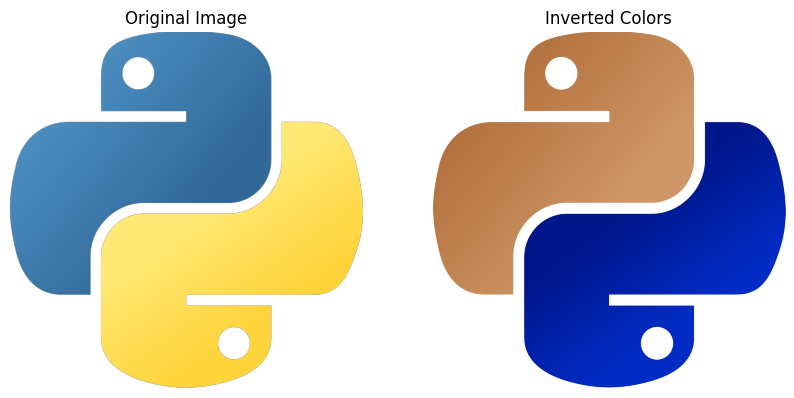

In [3]:
#Task 1
img_processor.invert_colors()


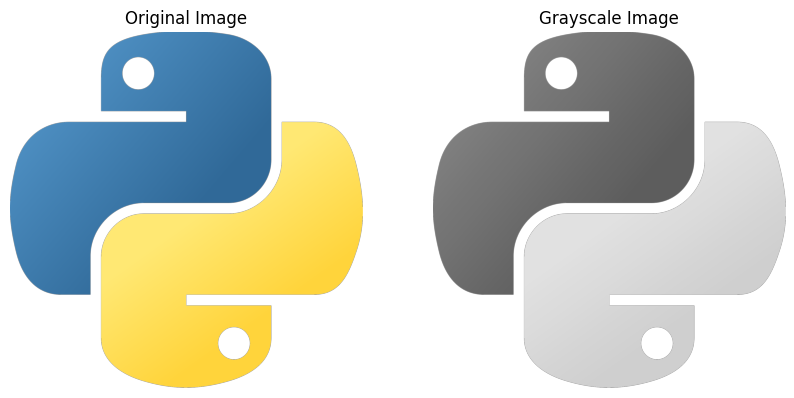

In [4]:
#Task 2
img_processor.to_grayscale()


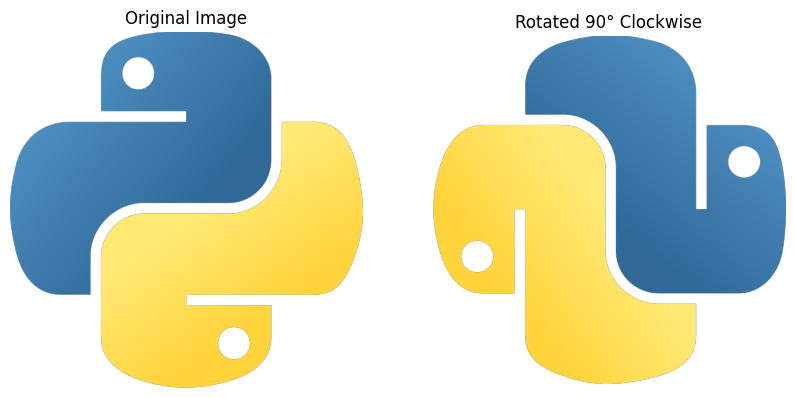

In [5]:
#Task 3
img_processor.rotate_90()


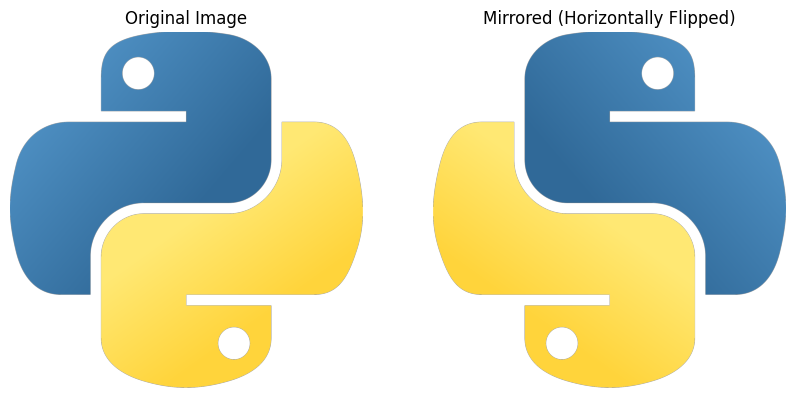

In [6]:
#Task 4
img_processor.mirror_horizontal()


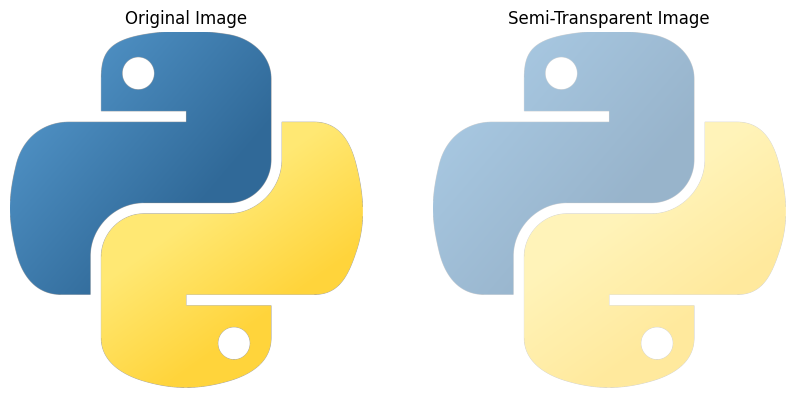

In [7]:
#Task 5
img_processor.change_transparency(0.5)


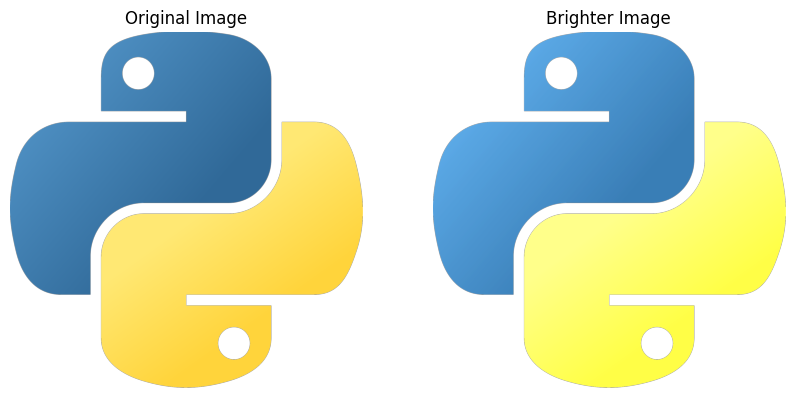

In [8]:
#Task 6
img_processor.increase_brightness(1.2)


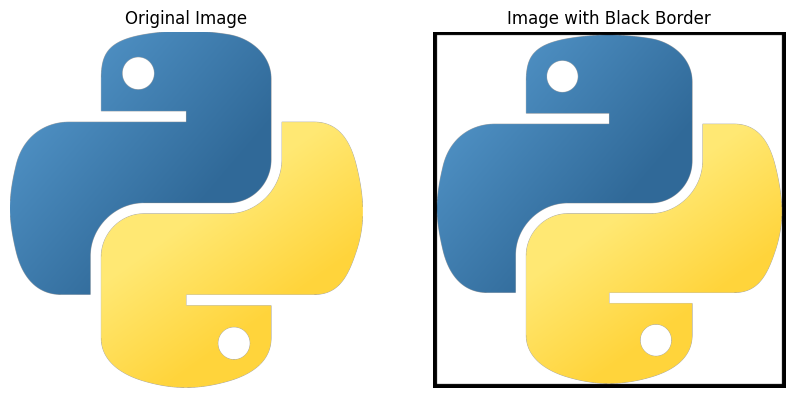

In [9]:
#Task 7
img_processor.add_black_border(20)


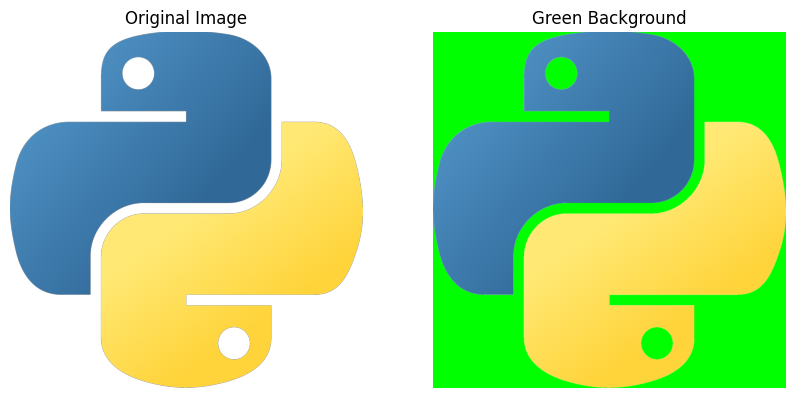

In [10]:
#Task 8
img_processor.change_background_to_green()


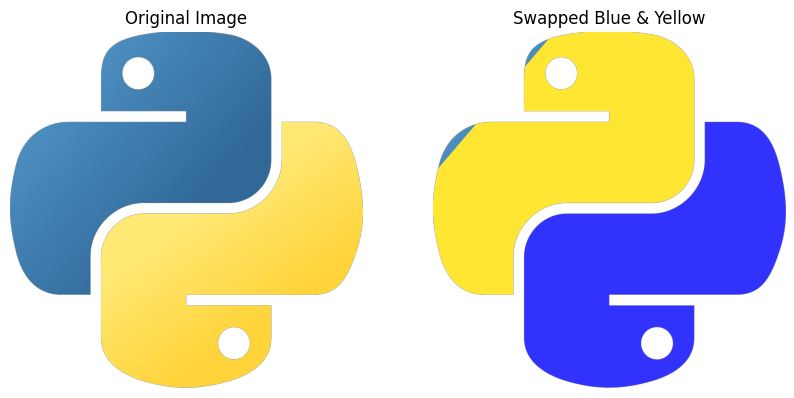

In [11]:
#Task 9
img_processor.swap_blue_yellow()


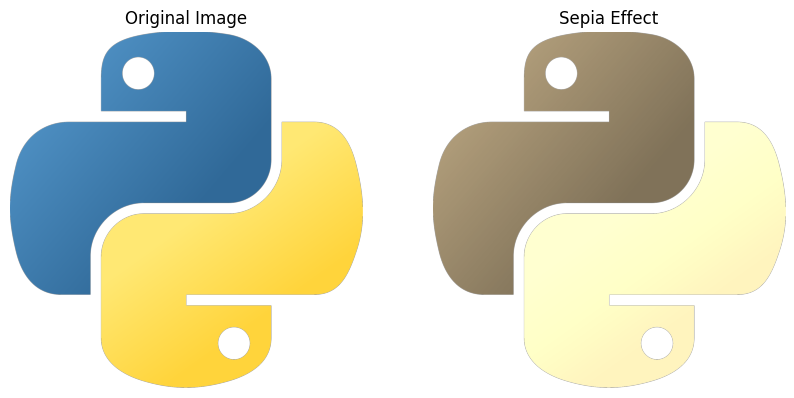

In [12]:
#Task 10
img_processor.apply_sepia()
